In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('df_anal2.pickle', 'rb') as f:
    df_anal2 = pickle.load(f)
with open('df_no_scailing_2.pickle', 'rb') as f:
    df_no_scailing_2 = pickle.load(f)
with open('fi_df2_rank.pickle', 'rb') as f:
    fi_df2_rank = pickle.load(f)

In [3]:
# 상위 10개 변수 리스트 추출
import seaborn as sns
import matplotlib.pyplot as plt

top10_vars = fi_df2_rank['feature_names'].tolist()
print(top10_vars)

# 상위 10개 변수와 HE_vitD 컬럼만 추출
df_top10 = df_no_scailing_2[['HE_vitD'] + top10_vars]
df_top10

def enc(x):
    if x == 0:
        return '충분'
    else:
        return '불충분'
df_top10['HE_vitD'] = df_top10['HE_vitD'].map(enc)

['HE_HBsAg', 'HE_BUN', 'HE_crea', 'region', 'HE_TG', 'HE_ht', 'HE_ast', 'HE_Bplt', 'HE_WBC', 'N_VITC']


In [4]:
df_top10_copy = df_top10.copy()

In [5]:
# # B형간염표면항원 (수치) 가   
# # 수치 < 1 : negative(-) 
# # 수치 >= 1 : positive(+) 

# def HBsAg(x):
#     return round(x,1)
# df_top10[top10_vars[0]] = df_top10[top10_vars[0]].map(HBsAg)

In [6]:
def city_category(x):
    if (x==0):
        return '서울'
    elif x==1:
        return '부산'
    elif x==2:
        return '대구'
    elif x==3:
        return '인천'
    elif x==4:
        return '광주'
    elif x==5:
        return '대전'
    elif x==6:
        return '울산'
    elif x==7:
        return '세종'
    elif x==8:
        return '경기' 
    elif x==9:
        return '강원' 
    elif x==10:
        return '충북' 
    elif x==11:
        return '충남' 
    elif x==12:
        return '전북' 
    elif x==13:
        return '전남' 
    elif x==14:
        return '경북' 
    elif x==15:
        return '경남'
    elif x==15:
        return '제주'
df_top10[top10_vars[3]] = df_top10[top10_vars[3]].map(city_category)

In [7]:
#B형간염표면항원(수치) 이상치 제거

def HE_HBsAg(x):
    if x >= 0.8:
        return 0.8
    else:
        return x
    
df_top10[top10_vars[0]] = df_top10[top10_vars[0]].map(HE_HBsAg)

In [8]:
#혈중요소질소 이상치 제거

def HE_BUN(x):
    if x >= 23.6:
        return 23.6
    if x <= 4.0:
        return 4.0
    else:
        return x
    
df_top10[top10_vars[1]] = df_top10[top10_vars[1]].map(HE_BUN)

In [9]:
#혈중크레아티닌 이상치 제거

def HE_crea(x):
    if x <= 0.5:
        return 0.5
    elif x >= 1:
        return 1
    else:
        return x
    
df_top10[top10_vars[2]] = df_top10[top10_vars[2]].map(HE_crea)

In [10]:
#중성지방 이상치 제거

def HE_TG(x):
    if x >= 100:
        return 100
    elif x <= 50:
        return 50
    else:
        return x
    
df_top10[top10_vars[4]] = df_top10[top10_vars[4]].map(HE_TG)

In [11]:
#신장 이상치 제거

def HE_ht(x):
    if x <=140.0:
        x = 140.0
    return round(x,0)
    
df_top10[top10_vars[5]] = df_top10[top10_vars[5]].map(HE_ht)

In [12]:
#GOT 이상치 제거

def HE_ast(x):
    if x <= 9:
        return 9
    if x >= 37:
        return 37
    else:
        return x
    
df_top10[top10_vars[6]] = df_top10[top10_vars[6]].map(HE_ast)

In [13]:
#혈소판 이상치 제거

def HE_Bplt(x):
    if x <= 220:
        return 220
    elif x >= 300:
        return 300
    else:
        return x
    
df_top10[top10_vars[7]] = df_top10[top10_vars[7]].map(HE_Bplt)

In [14]:
#백혈구 이상치 제거

def HE_WBC(x):
    if x <= 3:
        return 3
    elif x >= 10:
        return 10
    else:
        return round(x,1)

df_top10[top10_vars[8]] = df_top10[top10_vars[8]].map(HE_WBC)

In [15]:
#비타민C 이상치 제거

def N_VITC(x):
    if x <= 50:
        return 50
    elif x >= 100:
        return 100
    else:
        return round(x,0)
    
df_top10[top10_vars[9]] = df_top10[top10_vars[9]].map(N_VITC)

In [16]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

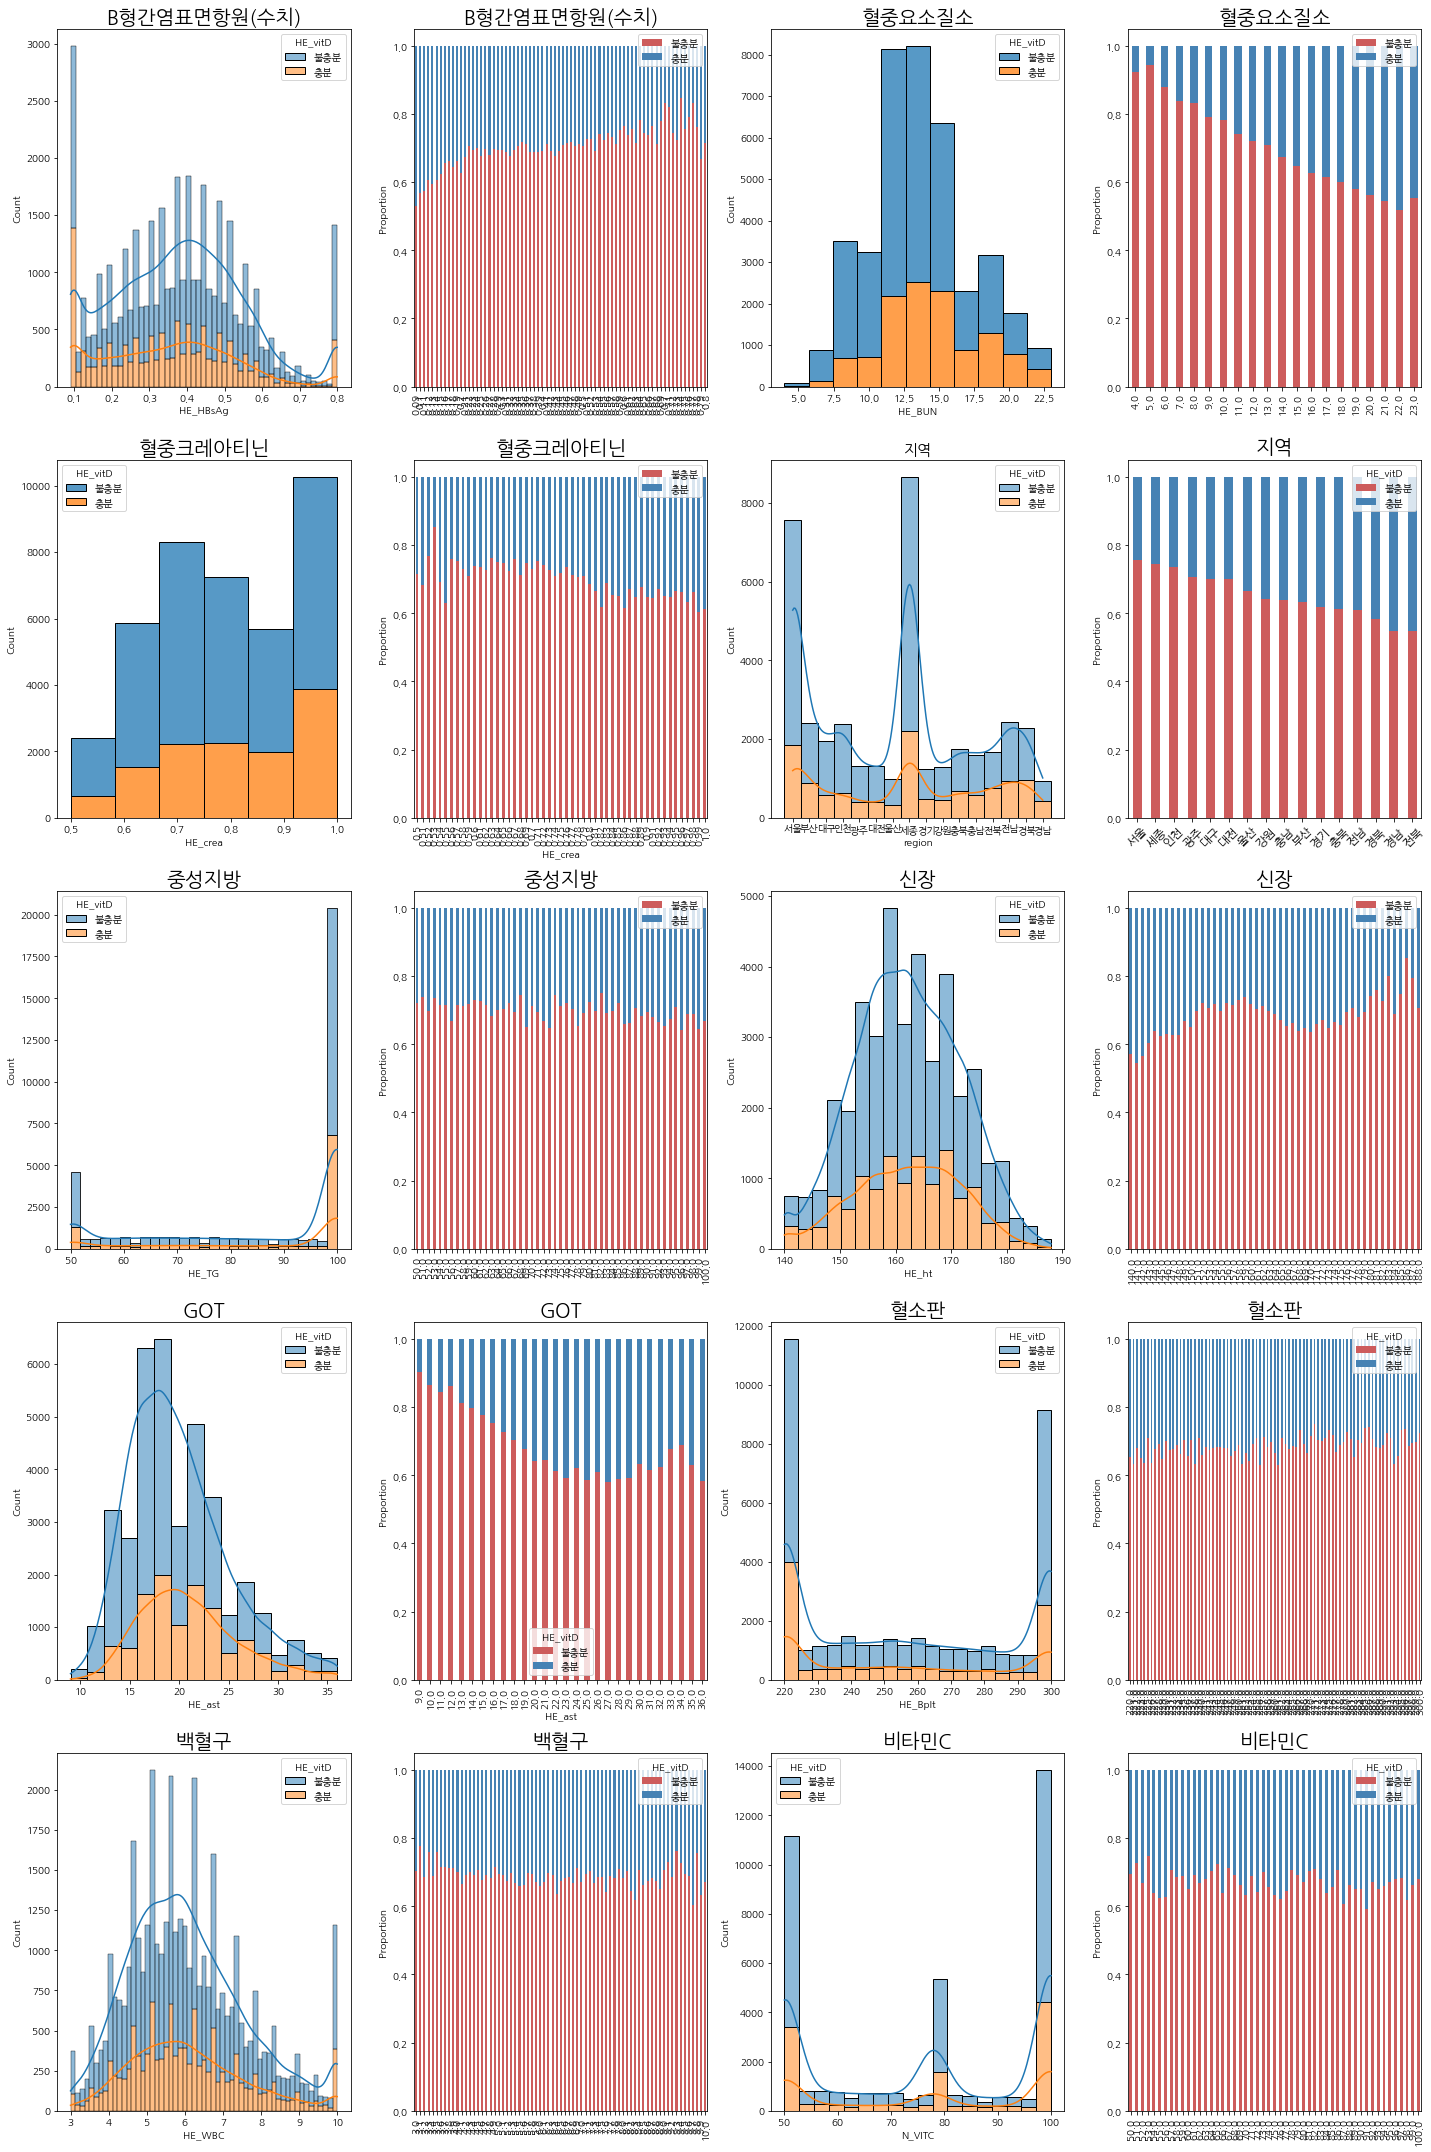

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
import seaborn as sns


fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 30))
plt.subplots_adjust(hspace=0.4)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#ax[0,0]  "HE_HBsAg"
ax = axes[0, 0]

Q1 = df_top10[top10_vars[0]].quantile(0.25)
Q3 = df_top10[top10_vars[0]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[0]] < lower_bound) | (df_top10[top10_vars[0]] > upper_bound))][top10_vars[0]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, ax=ax, multiple='stack')
ax.set_title('B형간염표면항원(수치)', fontsize=20)

#ax[0,1]  "HE_HBsAg"
ax = axes[0, 1]

Q1 = df_top10[top10_vars[0]].quantile(0.25)
Q3 = df_top10[top10_vars[0]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[0]] < lower_bound) | (df_top10[top10_vars[0]] > upper_bound))][top10_vars[0]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])


ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.legend(loc='upper right')
ax.set_title('B형간염표면항원(수치)', fontsize=20)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#ax[0,2]  "HE_BUN"
ax = axes[0, 2]

Q1 = df_top10[top10_vars[1]].quantile(0.25)
Q3 = df_top10[top10_vars[1]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[1]] < lower_bound) | (df_top10[top10_vars[1]] > upper_bound))][top10_vars[1]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=False,bins = 11, ax=ax, multiple='stack')
ax.set_title('혈중요소질소', fontsize=20)


# #ax[0,3] "HE_BUN"
ax = axes[0, 3]

Q1 = df_top10[top10_vars[1]].quantile(0.25)
Q3 = df_top10[top10_vars[1]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[1]] < lower_bound) | (df_top10[top10_vars[1]] > upper_bound))][top10_vars[1]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.legend(loc='upper right')
ax.set_title('혈중요소질소', fontsize=20)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



#ax[1,0]  "HE_crea"
ax = axes[1, 0]

Q1 = df_top10[top10_vars[2]].quantile(0.25)
Q3 = df_top10[top10_vars[2]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[2]] < lower_bound) | (df_top10[top10_vars[2]] > upper_bound))][top10_vars[2]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=False, bins = 6,ax=ax, multiple='stack')
ax.set_title('혈중크레아티닌', fontsize=20)

#ax[1,1] "HE_crea"
ax = axes[1, 1]

Q1 = df_top10[top10_vars[2]].quantile(0.25)
Q3 = df_top10[top10_vars[2]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)



ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.set_title('혈중크레아티닌', fontsize=20)



data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[2]] < lower_bound) | (df_top10[top10_vars[2]] > upper_bound))][top10_vars[2]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

ax.set_xlabel(top10_vars[2])
ax.set_ylabel('Proportion')
ax.legend(loc='upper right')
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# #ax[1,2]  "region"
ax = axes[1, 2]



sns.histplot(x=df_top10[top10_vars[3]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, ax=ax, multiple='stack')
ax.set_title('지역', fontsize=15)


#ax[1,3] "region"
ax = axes[1, 3]

data_crosstab = pd.crosstab(index=df_top10[top10_vars[3]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab = data_crosstab.sort_values(by='충분')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.set_title('지역', fontsize=20)
lst_age = list(data_crosstab.index)
ax.set_xticklabels(lst_age, fontsize=12, rotation=45)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#ax[2,0]  "HE_TG"
ax = axes[2, 0]

Q1 = df_top10[top10_vars[4]].quantile(0.25)
Q3 = df_top10[top10_vars[4]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[4]] < lower_bound) | (df_top10[top10_vars[4]] > upper_bound))][top10_vars[4]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, ax=ax, multiple='stack')
ax.set_title('중성지방', fontsize=20)


#ax[2,1] "HE_TG"

ax = axes[2, 1]

Q1 = df_top10[top10_vars[4]].quantile(0.25)
Q3 = df_top10[top10_vars[4]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[4]] < lower_bound) | (df_top10[top10_vars[4]] > upper_bound))][top10_vars[4]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')

data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])


ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.legend(loc='upper right')
ax.set_title('중성지방', fontsize=20)

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#ax[2,2]  "HE_ht"
ax = axes[2, 2]

Q1 = df_top10[top10_vars[5]].quantile(0.25)
Q3 = df_top10[top10_vars[5]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[5]] < lower_bound) | (df_top10[top10_vars[5]] > upper_bound))][top10_vars[5]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, bins = 19, ax=ax, multiple='stack')
ax.set_title('신장', fontsize=20)



# # #ax[2,1]  "HE_ht"
ax = axes[2, 3]

Q1 = df_top10[top10_vars[5]].quantile(0.25)
Q3 = df_top10[top10_vars[5]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[5]] < lower_bound) | (df_top10[top10_vars[5]] > upper_bound))][top10_vars[5]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')

data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])


ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.legend(loc='upper right')
ax.set_title('신장', fontsize=20)


#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#ax[3,0]  "HE_ast"
ax = axes[3, 0]

Q1 = df_top10[top10_vars[6]].quantile(0.25)
Q3 = df_top10[top10_vars[6]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[6]] < lower_bound) | (df_top10[top10_vars[6]] > upper_bound))][top10_vars[6]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True,bins = 16 , ax=ax, multiple='stack')
ax.set_title('GOT', fontsize=20)



# # #ax[3,1] "HE_ast"
ax = axes[3, 1]

Q1 = df_top10[top10_vars[6]].quantile(0.25)
Q3 = df_top10[top10_vars[6]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.set_title('GOT', fontsize=20)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[6]] < lower_bound) | (df_top10[top10_vars[6]] > upper_bound))][top10_vars[6]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#ax[3,2]  "HE_Bplt"
ax = axes[3, 2]

Q1 = df_top10[top10_vars[7]].quantile(0.25)
Q3 = df_top10[top10_vars[7]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[7]] < lower_bound) | (df_top10[top10_vars[7]] > upper_bound))][top10_vars[7]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, ax=ax, multiple='stack')
ax.set_title('혈소판', fontsize=20)





# # #ax[3,3] "HE_Bplt"
ax = axes[3, 3]

Q1 = df_top10[top10_vars[7]].quantile(0.25)
Q3 = df_top10[top10_vars[7]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[7]] < lower_bound) | (df_top10[top10_vars[7]] > upper_bound))][top10_vars[7]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.set_title('혈소판', fontsize=20)

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#ax[4,0]  "HE_WBC"
ax = axes[4, 0]

Q1 = df_top10[top10_vars[8]].quantile(0.25)
Q3 = df_top10[top10_vars[8]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[8]] < lower_bound) | (df_top10[top10_vars[8]] > upper_bound))][top10_vars[8]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, ax=ax, multiple='stack')
ax.set_title('백혈구', fontsize=20)


# #ax[4,1] "HE_WBC"
ax = axes[4, 1]

Q1 = df_top10[top10_vars[8]].quantile(0.25)
Q3 = df_top10[top10_vars[8]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[8]] < lower_bound) | (df_top10[top10_vars[8]] > upper_bound))][top10_vars[8]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.set_title('백혈구', fontsize=20)
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#ax[4,2]  "N_VITC"
ax = axes[4, 2]

Q1 = df_top10[top10_vars[9]].quantile(0.25)
Q3 = df_top10[top10_vars[9]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

sns.histplot(x=df_top10[~((df_top10[top10_vars[9]] < lower_bound) | (df_top10[top10_vars[9]] > upper_bound))][top10_vars[9]], hue=df_top10['HE_vitD'],\
             data=df_top10, legend=True,kde=True, ax=ax, multiple='stack')
ax.set_title('비타민C', fontsize=20)


# #ax[4,3] "N_VITC"

ax = axes[4, 3]

Q1 = df_top10[top10_vars[9]].quantile(0.25)
Q3 = df_top10[top10_vars[9]].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계값 계산
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data_crosstab = pd.crosstab(index=df_top10[~((df_top10[top10_vars[9]] < lower_bound) | (df_top10[top10_vars[9]] > upper_bound))][top10_vars[9]],\
                            columns=df_top10['HE_vitD'], margins=False, normalize='index')
data_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['indianred', 'steelblue'])

ax.set_xlabel('')
ax.set_ylabel('Proportion')
ax.set_title('비타민C', fontsize=20)
    
plt.tight_layout()
plt.show()